imporitng libraries 

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 



#models 

from sklearn.linear_model import LogisticRegression 

# model evaluater 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import confusion_matrix , classification_report , precision_score , recall_score , f1_score

In [19]:
df = pd.read_csv('D:\\Desktop\\archive\\seattle-weather.csv')

df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1/2/2012,10.9,10.6,2.8,4.5,rain
1,1/3/2012,0.8,11.7,7.2,2.3,rain
2,1/4/2012,20.3,12.2,5.6,4.7,rain
3,1/5/2012,1.3,8.9,2.8,6.1,rain
4,1/6/2012,2.5,4.4,2.2,2.2,rain


In [20]:
#Balancing the data classes 
rainy_count = df['weather'].value_counts().get('rain', 1)
sunny_count = df['weather'].value_counts().get('sun', 0)

rainy_count, sunny_count

(np.int64(640), np.int64(640))

Deviding data into dependent and independent variables 

In [21]:
x = df.drop('weather' ,axis=1)

y = df.weather.values

x.head()


,date,precipitation,temp_max,temp_min,wind
0,1/2/2012,10.9,10.6,2.8,4.5
1,1/3/2012,0.8,11.7,7.2,2.3
2,1/4/2012,20.3,12.2,5.6,4.7
3,1/5/2012,1.3,8.9,2.8,6.1
4,1/6/2012,2.5,4.4,2.2,2.2


Converting y to 0 and 1 form so that logistic regrassion can support it 

In [22]:
le = LabelEncoder()
y = le.fit_transform(df['weather'])

EDA

<Axes: xlabel='weather'>

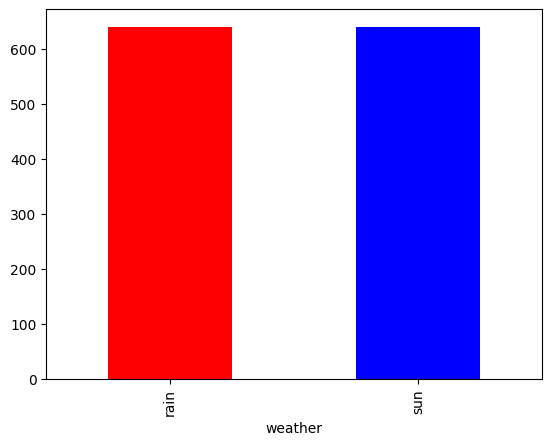

In [23]:
# Visualizing data classes

df['weather'].value_counts().plot(kind='bar', color=['red', 'blue'])


Exploratory Data Analysis (EDA)

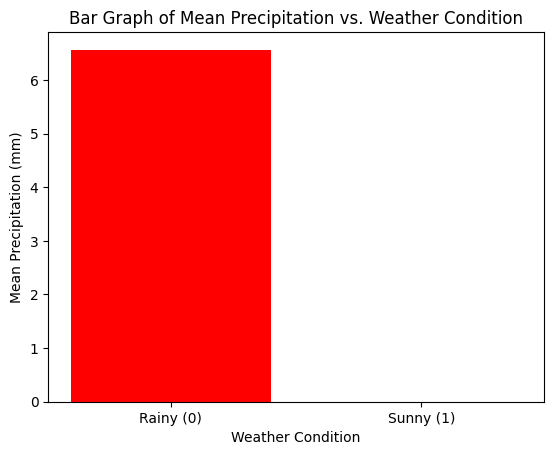

In [24]:
mean_precipitation = [df.precipitation[y == 0].mean(), df.precipitation[y == 1].mean()]
conditions = ['Rainy (0)', 'Sunny (1)']

# Create a bar graph
plt.bar(conditions, mean_precipitation, color=['red', 'blue'])
plt.ylabel('Mean Precipitation (mm)')
plt.xlabel('Weather Condition')
plt.title('Bar Graph of Mean Precipitation vs. Weather Condition')
plt.show()

NOTE : The above bar graph is showing that only whenever the precipitation is 0 only then the day is sunny 

Max Temperature 

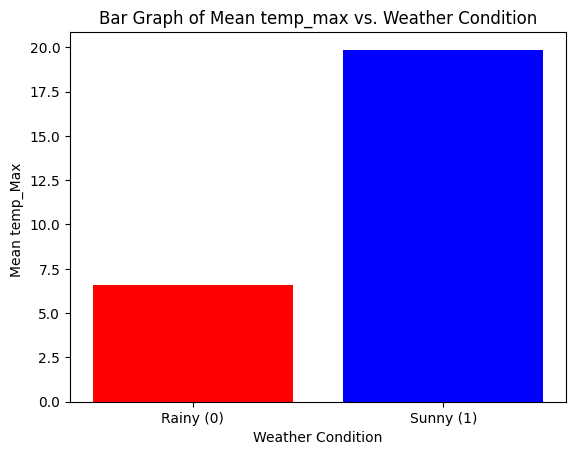

In [25]:
mean_precipitation = [df.precipitation[y == 0].mean(), df.temp_max[y == 1].mean()]
conditions = ['Rainy (0)', 'Sunny (1)']

# Create a bar graph
plt.bar(conditions, mean_precipitation, color=['red', 'blue'])
plt.ylabel('Mean temp_Max ')
plt.xlabel('Weather Condition')
plt.title('Bar Graph of Mean temp_max vs. Weather Condition')
plt.show()

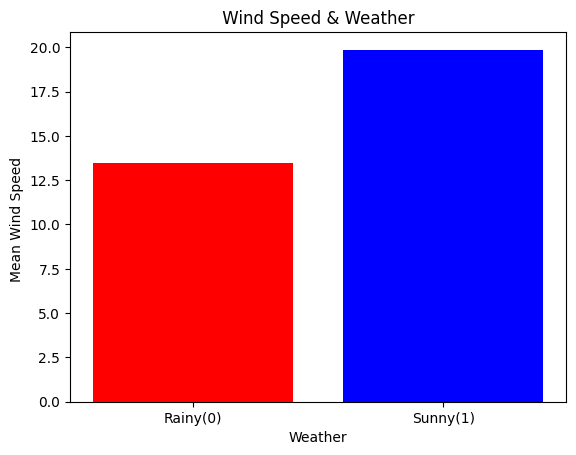

In [26]:
mean_wind_Speed = [df.temp_max[y==0].mean() , df.temp_max[y==1].mean()]
conditions = ['Rainy(0)' , 'Sunny(1)']

plt.bar(conditions , mean_wind_Speed , color= ["red" ,'blue'])
plt.xlabel('Weather')
plt.ylabel('Mean Wind Speed ')
plt.title(" Wind Speed & Weather ")
plt.show()

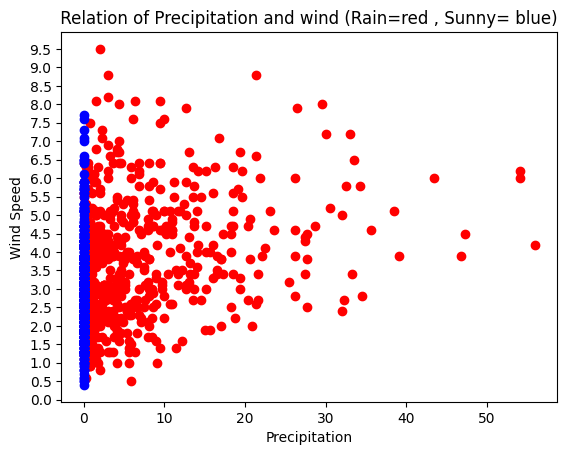

<Figure size 800x800 with 0 Axes>

In [27]:
plt.scatter(df.precipitation[y==0] , df.wind[y==0] , color='red')
plt.scatter(df.precipitation[y==1] , df.wind[y==1] , color='blue')

plt.title(" Relation of Precipitation and wind (Rain=red , Sunny= blue) ")
plt.xlabel('Precipitation')
plt.ylabel('Wind Speed')
plt.yticks(ticks=np.arange(0 , 10 , 0.5))
plt.figure(figsize=(8, 8))
plt.show()


Spliting data for test and training 

In [36]:
np.random.seed(42)
x = x.drop('date' , axis=1)
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.30)


Training Model 


XGB Classifier :


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.linear_model import LogisticRegression

Log_Reg  = LogisticRegression()
Log_Reg.fit(x_train , y_train)
print("Logistic regression result " , Log_Reg.score(x_test, y_test)*100 , "%")

Logistic regression result  95.57291666666666 %


In [39]:
adb = AdaBoostClassifier(algorithm='SAMME')
adb.fit(x_train , y_train)
print(" AdaBoost result ",adb.score(x_test, y_test)*100 , "% ")


 AdaBoost result  96.61458333333334 % 


In [40]:
knn = KNeighborsClassifier()
knn.fit(x_train , y_train)
print(" KNN result ", knn.score(x_test , y_test)*100 ,"% ")


 KNN result  90.36458333333334 % 


As AdaBoost  classifier give more than 96 % results so we will choose it as our model 